Import all the libraries we intend to use

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn


Read in the test and trian datasets into dataframes

In [29]:
titanic_train = pd.read_csv('/Users/judygitahi/Code/upgraded-potato/1-Titanic/data/train.csv')
titanic_test = pd.read_csv('/Users/judygitahi/Code/upgraded-potato/1-Titanic/data/test.csv')


Explore the data/ understand what it looks like. The training data set has 891 rows and 12 columns, the test data has 418 rows and 11 columns. The train dataset has an extra column for whether they survived or not, againist which we will train our own dataset. The 11 variables are what we use as predictor variables for a passengers survival.

In [5]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [6]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looking at the type of data we have, and types of variables in the train dataset we are using

In [8]:
titanic_train.info()
titanic_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Null values are going to affect the prediction so we check how many are in the training dataset. Cabin has a lot of missing values so we might actually drop it down the line. I also check the number of people who died -- it seems that most people did not survive :(

In [9]:
titanic_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

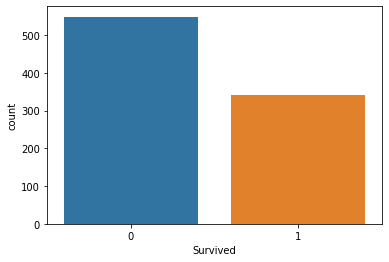

In [10]:
sns.countplot(x='Survived', data=titanic_train)

Here I plot survival as a function of various other variables, for instance, the fare they paid. 
Keeping in mind that correlation does not always imply causation, this shows that passengers who paid more were more likely to survive.

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

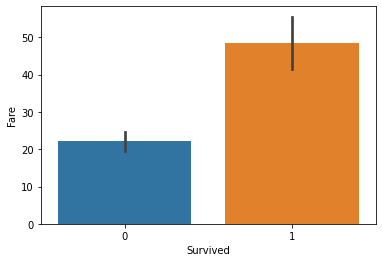

In [11]:
sns.barplot(x='Survived', y='Fare', data=titanic_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

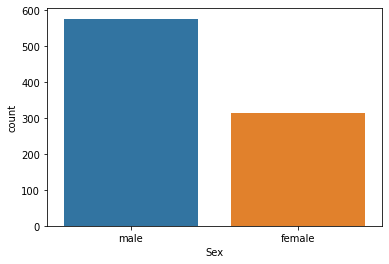

In [12]:
sns.countplot(x='Sex', data=titanic_train)

More female passengers survived as compared to men.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

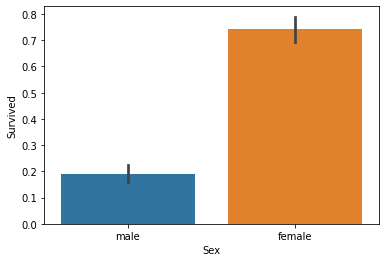

In [13]:
sns.barplot(x='Sex', y='Survived', data=titanic_train)


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

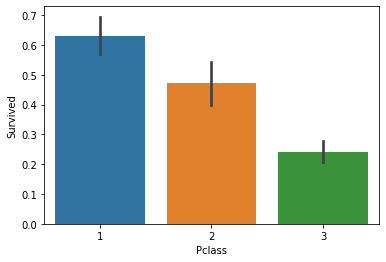

In [14]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)


Passengers in pclass 1 were more likely to survive as compared to other passengers, despite class three having more passengers

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

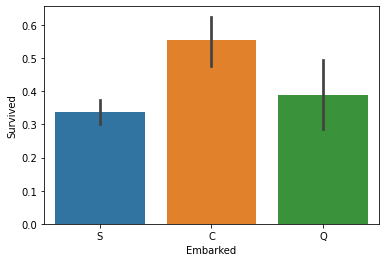

In [23]:
sns.barplot(x='Embarked', y='Survived', data=titanic_train)


In [15]:
titanic_train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [18]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
titanic_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Age', ylabel='Count'>

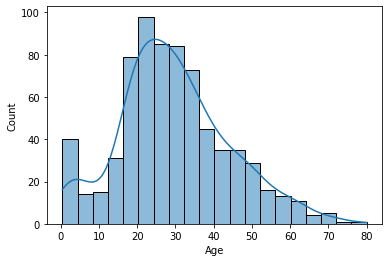

In [21]:
sns.histplot(data = titanic_train['Age'], kde = True)


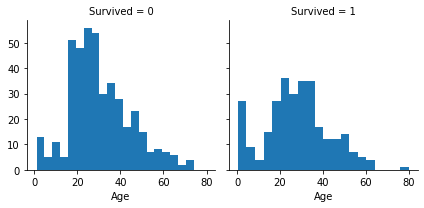

In [22]:
g = sns.FacetGrid(titanic_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [25]:
titanic_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


#
Now we clean up the data a bit, first drop columns wth too many nulls since they will probably be of little significance. And for age we fill in the nulls with zeros.

In [30]:
titanic_train.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic_train['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)
titanic_train.dropna(axis=0, inplace=True)


In [31]:
titanic_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [32]:
titanic_test.drop(['Name', 'Cabin', 'PassengerId', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic_test['Age'].fillna(value=titanic_train['Age'].mean(), inplace=True)
titanic_test.dropna(axis=0, inplace=True)
titanic_test.head()


,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


making age a categorical variable to amke it easier to work with

In [33]:
titanic_train.loc[ titanic_train['Age'] <= 16, 'Age'] = 0
titanic_train.loc[(titanic_train['Age'] > 16) & (titanic_train['Age'] <= 32), 'Age'] = 1
titanic_train.loc[(titanic_train['Age'] > 32) & (titanic_train['Age'] <= 48), 'Age'] = 2
titanic_train.loc[(titanic_train['Age'] > 48) & (titanic_train['Age'] <= 64), 'Age'] = 3
titanic_train.loc[ titanic_train['Age'] > 64, 'Age']


33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

In [34]:
titanic_train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,1.0,7.2500,S
1,1,1,female,2.0,71.2833,C
2,1,3,female,1.0,7.9250,S
3,1,1,female,2.0,53.1000,S
4,0,3,male,2.0,8.0500,S


Next we encode the categorical variables in our dataset, like sex and embarked. But first we change them into a contiguous flattened array

In [35]:

X_train = titanic_train.iloc[:, 1:].values
y_train = titanic_train.iloc[:, :1].values.ravel()
print(X_train.shape)
print(y_train.shape)

(889, 5)
(889,)


In [37]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_train = columnTransformer.fit_transform(X_train)

In [38]:
X_train

array([[0.0, 0.0, 1.0, ..., 3, 1.0, 7.25],
       [1.0, 0.0, 0.0, ..., 1, 2.0, 71.2833],
       [0.0, 0.0, 1.0, ..., 3, 1.0, 7.925],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 1.0, 23.45],
       [1.0, 0.0, 0.0, ..., 1, 1.0, 30.0],
       [0.0, 1.0, 0.0, ..., 3, 1.0, 7.75]], dtype=object)

Do the same preparation process for the train dataset

In [40]:
titanic_test.loc[ titanic_test['Age'] <= 16, 'Age'] = 0
titanic_test.loc[(titanic_test['Age'] > 16) & (titanic_test['Age'] <= 32), 'Age'] = 1
titanic_test.loc[(titanic_test['Age'] > 32) & (titanic_test['Age'] <= 48), 'Age'] = 2
titanic_test.loc[(titanic_test['Age'] > 48) & (titanic_test['Age'] <= 64), 'Age'] = 3
titanic_test.loc[ titanic_test['Age'] > 64, 'Age']

titanic_test.head()



,Pclass,Sex,Age,Fare,Embarked
0,3,male,0.0,7.8292,Q
1,3,female,0.0,7.0000,S
2,2,male,0.0,9.6875,Q
3,3,male,0.0,8.6625,S
4,3,female,0.0,12.2875,S


In [41]:
X_test = titanic_test.iloc[:, :].values

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
X_test = columnTransformer.fit_transform(X_test)

X_test.shape


(417, 8)

In [42]:
X_test


array([[0.0, 1.0, 0.0, ..., 3, 0.0, 7.8292],
       [0.0, 0.0, 1.0, ..., 3, 0.0, 7.0],
       [0.0, 1.0, 0.0, ..., 2, 0.0, 9.6875],
       ...,
       [0.0, 0.0, 1.0, ..., 3, 0.0, 7.25],
       [0.0, 0.0, 1.0, ..., 3, 0.0, 8.05],
       [1.0, 0.0, 0.0, ..., 3, 0.0, 22.3583]], dtype=object)

Now to the modelling.

In [55]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


KNN

In [56]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn1 = round(knn.score(X_train, y_train) * 100, 2)
knn1

85.26

Gaussian

In [58]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
gaus1 = round(gaussian.score(X_train, y_train) * 100, 2)
gaus1

77.95

Decision tree

In [59]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
dtree= round(decision_tree.score(X_train, y_train) * 100, 2)
dtree

93.03

Random forest

In [60]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
randf = round(random_forest.score(X_train, y_train) * 100, 2)
randf

93.03

Random forest gave the best score